In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64

In [4]:
path = Path('images'); path

PosixPath('images')

In [5]:
np.random.seed(2)
def get_labels(file_path): return float(str(file_path).split(",")[1].split(".p")[0])

In [6]:
data = (ImageList.from_folder(path)
                .split_by_folder(train = "train_CLOSE", valid = "validation_CLOSE",)
                .label_from_func(get_labels)
                .add_test_folder(test_folder = "test_CLOSE")
                .databunch().normalize(imagenet_stats)
            )

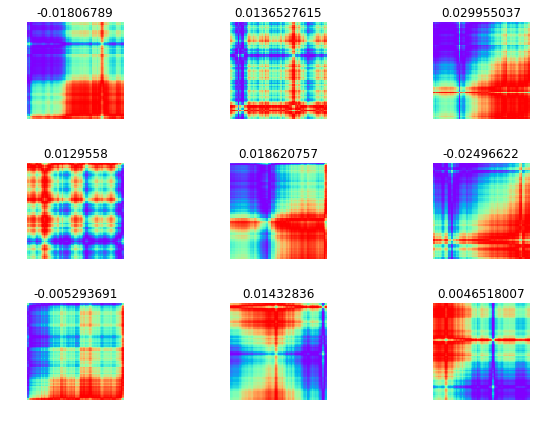

In [7]:
data.show_batch(3, figsize=(9,6))

In [8]:
learn = cnn_learner(data, models.resnet50, metrics = [r2_score, root_mean_squared_error])

In [9]:
learn.unfreeze()

In [10]:
learn.fit_one_cycle(9)

epoch,train_loss,valid_loss,r2_score,root_mean_squared_error,time
0,0.719996,0.343081,-967.522705,0.382981,00:26
1,0.154592,0.018834,-64.716537,0.113109,00:23
2,0.045804,0.002085,-6.270226,0.041266,00:23
3,0.025265,1.582417,-6581.096191,0.783028,00:22
4,0.028581,0.001301,-1.965997,0.030804,00:23
5,0.014866,0.002410,-8.843349,0.038482,00:23
6,0.006633,0.001804,-5.199405,0.037785,00:23
7,0.003556,0.001582,-2.669182,0.034006,00:23
8,0.001885,0.000620,-0.254934,0.023417,00:23


In [11]:
learn.save('CLOSE-stage1')

In [10]:
learn.load('CLOSE-stage1')

Learner(data=ImageDataBunch;

Train: LabelList (13015 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: FloatList
-0.03093247,-0.019524118,-0.007184796,-0.01866832,-0.019109389
Path: images;

Valid: LabelList (1260 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: FloatList
-0.026998017,-0.030449305,-0.020590356,-0.0014728702,0.0075188144
Path: images;

Test: LabelList (251 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: EmptyLabelList
,,,,
Path: images, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0):

In [11]:
data_test = (ImageList.from_folder(path)
                .split_by_folder(train = "train_CLOSE", valid = "test_CLOSE",)
                .label_from_func(get_labels)
                .databunch().normalize(imagenet_stats)
            )

In [12]:
pred_metrics = learn.validate(data_test.test_dl)

In [13]:
pred_metrics

[0.0006196368, tensor(-0.2549), tensor(0.0234)]